## Numpy ndarray

In [57]:
import numpy as np

x = np.array([1, 2, 3])
print(x.__class__, x.shape, x.ndim)

W = np.array([[1, 2, 3], [4, 5, 6]])
print(W.shape, W.ndim)

<class 'numpy.ndarray'> (3,) 1
(2, 3) 2


In [58]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


## Broadcast

In [59]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [60]:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

## np.dot & np.matmul

####  1차원 np.dot()은 행렬 곱 수행, 2차원 이상 np.dot()은 내적 수행

In [61]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b))

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(np.matmul(A, B))

32
[[19 22]
 [43 50]]


## Sigmoid Function

#### FC에 의한 변환은 선형 변환이기에 비선형 효과를 부여하기 위해 Activation Function 요구

In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

h = np.random.randint(1, 10, (10, 4))
a = sigmoid(h)
print(h)
print(a)

[[4 7 1 3]
 [5 6 2 2]
 [9 6 2 4]
 [8 4 6 5]
 [8 2 8 1]
 [8 4 3 4]
 [2 8 3 8]
 [2 2 4 9]
 [7 9 8 4]
 [7 2 4 6]]
[[0.98201379 0.99908895 0.73105858 0.95257413]
 [0.99330715 0.99752738 0.88079708 0.88079708]
 [0.99987661 0.99752738 0.88079708 0.98201379]
 [0.99966465 0.98201379 0.99752738 0.99330715]
 [0.99966465 0.88079708 0.99966465 0.73105858]
 [0.99966465 0.98201379 0.95257413 0.98201379]
 [0.88079708 0.99966465 0.95257413 0.99966465]
 [0.88079708 0.88079708 0.98201379 0.99987661]
 [0.99908895 0.99987661 0.99966465 0.98201379]
 [0.99908895 0.88079708 0.98201379 0.99752738]]


In [63]:
x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.random(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

s, s.max()

(array([[-0.0659715 , -0.71100671,  0.94634006],
        [ 0.83662223, -0.52520391,  0.56136101],
        [-0.43087855, -0.51725485,  1.50147874],
        [ 0.62581206, -0.38559627,  1.25881466],
        [ 0.22892992, -0.17436715,  2.07814874],
        [-0.09238859, -0.68568673,  1.03274413],
        [ 0.16701582, -0.60858105,  1.05858175],
        [ 0.62315357, -0.58135316,  0.63475243],
        [ 0.54021278, -0.2725919 ,  1.6158416 ],
        [ 0.60566895, -0.49646136,  0.98467708]]),
 2.0781487416982163)

### All layers have forward() & backward() <br> All Layers have params & grads

In [64]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [65]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [66]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)

        return x

In [67]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

s

array([[ 1.40435783, -0.77452281,  0.20789873],
       [ 1.45999447, -0.85111197,  0.63701533],
       [ 1.83079109, -0.75962235,  0.86235148],
       [ 1.51378331, -0.80130772,  0.39647994],
       [ 1.66343819, -0.81867685,  0.80596508],
       [ 1.38494857, -0.92328472,  0.64850609],
       [ 1.09951853, -0.81629541,  0.03040727],
       [ 1.20016349, -0.64594345, -0.29155705],
       [ 1.48511154, -0.8491567 ,  0.65275189],
       [ 1.64389353, -0.84087006,  0.81067857]])

### forward -> 추론 | backward -> 학습

### Repeat Node

In [68]:
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

In [69]:
x.shape, y.shape, dy.shape, dx.shape

((1, 8), (7, 8), (7, 8), (1, 8))

### Sum Node

In [70]:
import numpy as np

D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

In [71]:
x.shape, y.shape, dy.shape, dx.shape

((7, 8), (1, 8), (1, 8), (7, 8))

### MatMul Node

In [72]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

### Sigmoid with Backward()

In [73]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

### Softmax with Loss

In [74]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        

    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

### Affine Layer with Backward()

In [75]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx

### SGD

In [76]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

### Using Spiral Dataset

x (300, 2)
t (300, 3)


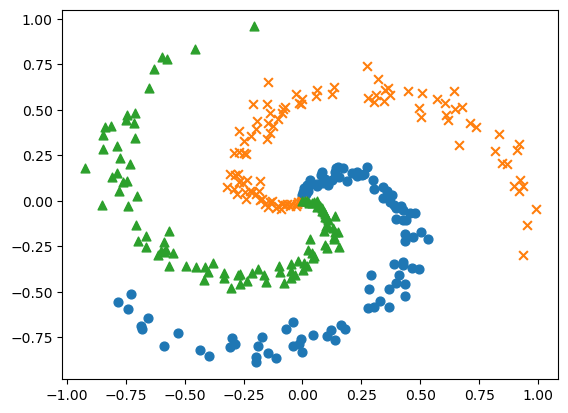

In [77]:
import sys
import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

## 선형 방식으로 분리 불가 -> 비선형 방식 요구됨

In [78]:
import sys
import numpy as np

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [79]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        if (iters + 1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f"Epoch : {epoch + 1}, Iteration : {(iters + 1)/max_iters}, Loss : {avg_loss}")
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

Epoch : 1, Iteration : 1.0, Loss : 1.1256062166823235
Epoch : 2, Iteration : 1.0, Loss : 1.1255202354489933
Epoch : 3, Iteration : 1.0, Loss : 1.1162613752115285
Epoch : 4, Iteration : 1.0, Loss : 1.1162867078413503
Epoch : 5, Iteration : 1.0, Loss : 1.1123000112951948
Epoch : 6, Iteration : 1.0, Loss : 1.1384639824108038
Epoch : 7, Iteration : 1.0, Loss : 1.1590961883070312
Epoch : 8, Iteration : 1.0, Loss : 1.1086316143023154
Epoch : 9, Iteration : 1.0, Loss : 1.1173305676924539
Epoch : 10, Iteration : 1.0, Loss : 1.1287957712269245
Epoch : 11, Iteration : 1.0, Loss : 1.1168438089353867
Epoch : 12, Iteration : 1.0, Loss : 1.108338779101816
Epoch : 13, Iteration : 1.0, Loss : 1.0876149200499459
Epoch : 14, Iteration : 1.0, Loss : 1.0766813865819347
Epoch : 15, Iteration : 1.0, Loss : 1.0442376735950387
Epoch : 16, Iteration : 1.0, Loss : 1.034578262633777
Epoch : 17, Iteration : 1.0, Loss : 0.9572932039643971
Epoch : 18, Iteration : 1.0, Loss : 0.918385321087945
Epoch : 19, Iteration 

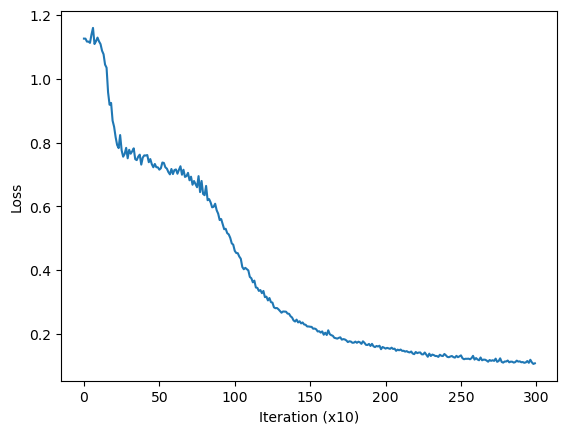

In [81]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('Iteration (x10)')
plt.ylabel('Loss')
plt.show()

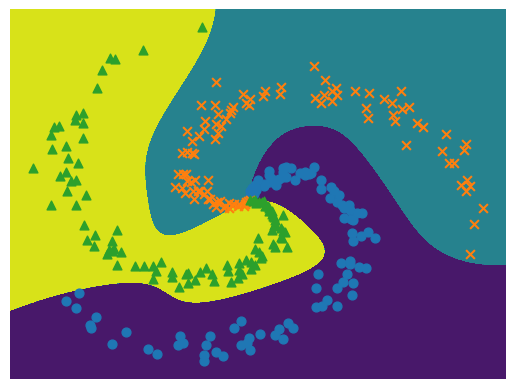

In [82]:
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()